# Goal:

Fisher's exact test: are the significant regions enriched/depleted in epigenomic features?




### Load packages

In [158]:
suppressPackageStartupMessages(library(tidyverse))

### Load and process perturbation data

#### Bin coordinates with perturbations

In [61]:
allregions <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/elementReference/combined/binnedgenome.int.k562.elementReference.20230415.merge.bed",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct()

head(allregions,n=1)
dim(allregions)

,bin
,<chr>
1,chr3:127573700-127574600


[1] 2733    1

#### Load output of bedtools intersect with genomic/epigenomic annotations

In [62]:
h3k27ac <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562h3k27ac.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

atac <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562atac.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

dnase <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562dnase.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

cellccre <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562ccres.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

allccre <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.allccres.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

unionDnase <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.uniondnase.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

In [63]:
h3k4me1 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562h3k4me1.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

h3k4me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562h3k4me3.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

h3k9me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562h3k9me3.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

h3k27me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562h3k27me3.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

ep300 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562ep300.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

ctcf <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562ctcf.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

polr2a <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562polr2a.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

In [64]:
rampage <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562rampage.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

cage <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562cage.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

grocap_capped <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementReference.k562grocap.capped.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

In [65]:
length(h3k27ac)
length(atac)
length(dnase)
length(cellccre)
length(allccre)
length(unionDnase)

[1] 755

[1] 1023

[1] 956

[1] 2321

[1] 2321

[1] 2266

In [66]:
length(h3k4me1)
length(h3k4me3)
length(h3k9me3)
length(h3k27me3)
length(ep300)
length(ctcf)
length(polr2a)

[1] 988

[1] 379

[1] 59

[1] 257

[1] 366

[1] 499

[1] 367

In [67]:
length(rampage)
length(cage)
length(grocap_capped)

[1] 142

[1] 143

[1] 422

#### Generate df with binary value for overlap with feature

In [68]:
workdf1 <-
allregions %>% 
mutate(dnase_union = ifelse(bin %in% unionDnase, 1, 0),
       ccre_all = ifelse(bin %in% allccre, 1, 0),
       ccre_k562 = ifelse(bin %in% cellccre, 1, 0),
       dnase_k562 = ifelse(bin %in% dnase, 1, 0),
       atac_k562 = ifelse(bin %in% atac, 1, 0),
       h3k27ac_k562 = ifelse(bin %in% h3k27ac, 1, 0),
       h3k4me1_k562 = ifelse(bin %in% h3k4me1, 1, 0),
       h3k4me3_k562 = ifelse(bin %in% h3k4me3, 1, 0),
       h3k9me3_k562 = ifelse(bin %in% h3k9me3, 1, 0),
       h3k27me3_k562 = ifelse(bin %in% h3k27me3, 1, 0),
       ep300_k562 = ifelse(bin %in% ep300, 1, 0),
       ctcf_k562 = ifelse(bin %in% ctcf, 1, 0),
       polr2a_k562 = ifelse(bin %in% polr2a, 1, 0),
       rampage_k562 = ifelse(bin %in% rampage, 1, 0),
       cage_k562 = ifelse(bin %in% cage, 1, 0),
       grocap_capped_k562 = ifelse(bin %in% grocap_capped, 1, 0)
       )

### Load and process significant element data

#### Bin coordinates with CREs

In [69]:
sigregions <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/elementQuant/combined/binnedgenome.int.k562.elementQuant.20230415.merge.bed",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct()

head(sigregions,n=1)
dim(sigregions)

,bin
,<chr>
1,chr3:127672600-127673300


[1] 210   1

#### Load output of bedtools intersect with genomic/epigenomic annotations

In [70]:
h3k27ac <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562h3k27ac.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

atac <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562atac.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

dnase <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562dnase.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

cellccre <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562ccres.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

allccre <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.allccres.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

unionDnase <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.uniondnase.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

In [71]:
h3k4me1 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562h3k4me1.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

h3k4me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562h3k4me3.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

h3k9me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562h3k9me3.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

h3k27me3 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562h3k27me3.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

ep300 <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562ep300.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

ctcf <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562ctcf.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

polr2a <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562polr2a.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

In [72]:
rampage <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562rampage.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

cage <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562cage.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

grocap_capped <- read.delim("/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/k562meta/outs/upset/binned.k562.elementQuant.k562grocap.capped.txt",
                         header=FALSE, col.names=c("bin.chr","bin.start","bin.end")) %>%
mutate(bin = paste0(bin.chr,":",bin.start,"-",bin.end)) %>% select(bin) %>% distinct() %>% pull()

In [73]:
length(h3k27ac)
length(atac)
length(dnase)
length(cellccre)
length(allccre)
length(unionDnase)

[1] 182

[1] 165

[1] 167

[1] 205

[1] 205

[1] 203

In [74]:
length(h3k4me1)
length(h3k4me3)
length(h3k9me3)
length(h3k27me3)
length(ep300)
length(ctcf)
length(polr2a)

[1] 159

[1] 117

[1] 0

[1] 1

[1] 89

[1] 72

[1] 127

In [75]:
length(rampage)
length(cage)
length(grocap_capped)

[1] 44

[1] 54

[1] 124

#### Generate df with binary value for overlap with feature

In [76]:
workdf2 <-
sigregions %>%
mutate(dnase_union = ifelse(bin %in% unionDnase, 1, 0),
       ccre_all = ifelse(bin %in% allccre, 1, 0),
       ccre_k562 = ifelse(bin %in% cellccre, 1, 0),
       dnase_k562 = ifelse(bin %in% dnase, 1, 0),
       atac_k562 = ifelse(bin %in% atac, 1, 0),
       h3k27ac_k562 = ifelse(bin %in% h3k27ac, 1, 0),
       h3k4me1_k562 = ifelse(bin %in% h3k4me1, 1, 0),
       h3k4me3_k562 = ifelse(bin %in% h3k4me3, 1, 0),
       h3k9me3_k562 = ifelse(bin %in% h3k9me3, 1, 0),
       h3k27me3_k562 = ifelse(bin %in% h3k27me3, 1, 0),
       ep300_k562 = ifelse(bin %in% ep300, 1, 0),
       ctcf_k562 = ifelse(bin %in% ctcf, 1, 0),
       polr2a_k562 = ifelse(bin %in% polr2a, 1, 0),
       rampage_k562 = ifelse(bin %in% rampage, 1, 0),
       cage_k562 = ifelse(bin %in% cage, 1, 0),
       grocap_capped_k562 = ifelse(bin %in% grocap_capped, 1, 0)
       )

### Compare perturbed vs significant

 1. Use the binned genome output files --> comparing the regions called significant versus those with a perturbation.


#### Approach 1. Compare the number of bins.

In [77]:
workdf1 %>%
pivot_longer(cols = dnase_union:grocap_capped_k562, names_to = "feature", values_to = "overlap") %>%
group_by(feature,overlap) %>%
summarise(n=n()) %>%
ungroup() 

`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


feature,overlap,n
<chr>,<dbl>,<int>
atac_k562,0,1710
atac_k562,1,1023
cage_k562,0,2590
cage_k562,1,143
ccre_all,0,412
ccre_all,1,2321
ccre_k562,0,412
ccre_k562,1,2321
ctcf_k562,0,2234


In [78]:
workdf2 %>%
pivot_longer(cols = dnase_union:grocap_capped_k562, names_to = "feature", values_to = "overlap") %>%
group_by(feature,overlap) %>%
summarise(n=n()) %>%
ungroup() 

`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


feature,overlap,n
<chr>,<dbl>,<int>
atac_k562,0,45
atac_k562,1,165
cage_k562,0,156
cage_k562,1,54
ccre_all,0,5
ccre_all,1,205
ccre_k562,0,5
ccre_k562,1,205
ctcf_k562,0,138


In [79]:
testdf <- rbind(
    workdf1 %>%
        pivot_longer(cols = dnase_union:grocap_capped_k562, names_to = "feature", values_to = "overlap") %>%
        group_by(feature,overlap) %>%
        summarise(n=n()) %>%
        ungroup() %>%
        mutate(result = "perturbed"),
    workdf2 %>%
        pivot_longer(cols = dnase_union:grocap_capped_k562, names_to = "feature", values_to = "overlap") %>%
        group_by(feature,overlap) %>%
        summarise(n=n()) %>%
        ungroup() %>%
        mutate(result = "significant")  
) %>%
arrange(feature, overlap, result)

head(testdf,n=8)

`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


feature,overlap,n,result
<chr>,<dbl>,<int>,<chr>
atac_k562,0,1710,perturbed
atac_k562,0,45,significant
atac_k562,1,1023,perturbed
atac_k562,1,165,significant
cage_k562,0,2590,perturbed
cage_k562,0,156,significant
cage_k562,1,143,perturbed
cage_k562,1,54,significant


##### All cCREs

In [80]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "ccre_all" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "ccre_all" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "ccre_all" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "ccre_all" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("All_cCREs",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- tempdf
res

,overlap,no_overlap
,<int>,<int>
sig,205,5
ns,2116,407



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value = 5.896e-10
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  3.292408 24.691248
sample estimates:
odds ratio 
  7.882993 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided


##### Union DHSs

In [81]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "dnase_union" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "dnase_union" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "dnase_union" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "dnase_union" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("All_DNase",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,203,7
ns,2063,460



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value = 2.307e-10
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  3.051625 16.389059
sample estimates:
odds ratio 
  6.463838 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided


##### K562 cCREs

In [82]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "ccre_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "ccre_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "ccre_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "ccre_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_cCREs",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,205,5
ns,2116,407



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value = 5.896e-10
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  3.292408 24.691248
sample estimates:
odds ratio 
  7.882993 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided


##### K562 DNase peaks

In [83]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "dnase_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "dnase_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "dnase_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "dnase_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_DNase",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,167,43
ns,789,1734



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  5.996871 12.349697
sample estimates:
odds ratio 
  8.527996 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided


##### K562 ATAC-seq peaks

In [84]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "atac_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "atac_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "atac_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "atac_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_ATAC",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,165,45
ns,858,1665



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  5.028326 10.228781
sample estimates:
odds ratio 
  7.110014 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided


##### K562 H3K27ac peaks

In [85]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "h3k27ac_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "h3k27ac_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "h3k27ac_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "h3k27ac_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_H3K27ac",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,182,28
ns,573,1950



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 14.60022 34.55476
sample estimates:
odds ratio 
   22.0826 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided


##### K562 H3K4me1 peaks

In [86]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "h3k4me1_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "h3k4me1_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "h3k4me1_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "h3k4me1_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_H3K4me1",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,159,51
ns,829,1694



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 4.562882 9.006936
sample estimates:
odds ratio 
  6.365856 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided


##### K562 H3K4me3 peaks

In [87]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "h3k4me3_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "h3k4me3_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "h3k4me3_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "h3k4me3_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_H3K4me3",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,117,93
ns,262,2261



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  7.940662 14.837480
sample estimates:
odds ratio 
  10.83966 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided


##### K562 H3K9me3 peaks

In [88]:
# get the values from workdf1 and workdf2
a <- 0 # testdf %>% filter(feature == "h3k9me3_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "h3k9me3_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "h3k9me3_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "h3k9me3_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_H3K9me3",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<dbl>,<int>
sig,0,210
ns,59,2464



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value = 0.02137
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.0000000 0.7642661
sample estimates:
odds ratio 
         0 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided
K562_H3K9me3,0.0213672723466523,0,two.sided


##### K562 H3K27me3 peaks

In [89]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "h3k27me3_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "h3k27me3_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "h3k27me3_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "h3k27me3_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_H3K27me3",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,1,209
ns,256,2267



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value = 1.985e-08
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.001067828 0.241114057
sample estimates:
odds ratio 
 0.0423884 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided
K562_H3K9me3,0.0213672723466523,0,two.sided


##### K562 EP300 peaks

In [90]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "ep300_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "ep300_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "ep300_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "ep300_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_EP300",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,89,121
ns,277,2246



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 4.353868 8.134307
sample estimates:
odds ratio 
  5.957537 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided
K562_H3K9me3,0.0213672723466523,0,two.sided


##### K562 CTCF peaks

In [91]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "ctcf_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "ctcf_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "ctcf_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "ctcf_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_CTCF",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,72,138
ns,427,2096



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value = 7.236e-09
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.861878 3.497862
sample estimates:
odds ratio 
  2.559933 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided
K562_H3K9me3,0.0213672723466523,0,two.sided


##### K562 POLR2A peaks

In [92]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "polr2a_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "polr2a_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "polr2a_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "polr2a_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_POLR2A",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,127,83
ns,240,2283



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 10.58304 20.02978
sample estimates:
odds ratio 
  14.52758 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided
K562_H3K9me3,0.0213672723466523,0,two.sided


##### K562 RAMPAGE

In [93]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "rampage_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "rampage_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "rampage_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "rampage_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_RAMPAGE",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,44,166
ns,98,2425



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 4.330274 9.803231
sample estimates:
odds ratio 
  6.550222 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided
K562_H3K9me3,0.0213672723466523,0,two.sided


##### K562 CAGE

In [94]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "cage_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "cage_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "cage_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "cage_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_CAGE",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,54,156
ns,89,2434



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  6.362011 13.960637
sample estimates:
odds ratio 
  9.450359 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided
K562_H3K9me3,0.0213672723466523,0,two.sided


##### K562 GRO_CAP 

In [95]:
# get the values from workdf1 and workdf2
a <- testdf %>% filter(feature == "grocap_capped_k562" & overlap == 1 & result == "significant") %>% select(n) %>% pull()
b <- testdf %>% filter(feature == "grocap_capped_k562" & overlap == 0 & result == "significant") %>% select(n) %>% pull()
c <- testdf %>% filter(feature == "grocap_capped_k562" & overlap == 1 & result == "perturbed") %>% select(n) %>% pull() - a
d <- testdf %>% filter(feature == "grocap_capped_k562" & overlap == 0 & result == "perturbed") %>% select(n) %>% pull() - b

# create a dataframe
fisherdf <- data.frame("overlap" = c(a, c), "no_overlap" = c(b, d), row.names = c("sig", "ns"))
fisherdf

# perform the test
fisher.test(fisherdf)

# store the output in new df
tempdf <- fisher.test(fisherdf)
tempdf <- data.frame(cbind("K562_GROCAP",tempdf$p.value,tempdf$estimate,tempdf$alternative))
rownames(tempdf) <- NULL
res <- rbind(res, tempdf)
res

,overlap,no_overlap
,<int>,<int>
sig,124,86
ns,298,2225



	Fisher's Exact Test for Count Data

data:  fisherdf
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  7.881497 14.717760
sample estimates:
odds ratio 
  10.74937 


X1,X2,X3,X4
<chr>,<chr>,<chr>,<chr>
All_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
All_DNase,2.30690419709409e-10,6.4638378633986,two.sided
K562_cCREs,5.89557252411057e-10,7.8829934987702,two.sided
K562_DNase,3.61395818578951e-43,8.52799557896517,two.sided
K562_ATAC,1.36506565841988e-36,7.11001398772456,two.sided
K562_H3K27ac,1.91349506124699e-78,22.0826026401055,two.sided
K562_H3K4me1,4.88881574889647e-34,6.36585560561038,two.sided
K562_H3K4me3,1.10867823674137e-51,10.83965681752,two.sided
K562_H3K9me3,0.0213672723466523,0,two.sided


#### Save results to .txt file

In [96]:
colnames(res) <- c("feature","pvalue","odds_ratio","alternative")
res$pvalue <- as.numeric(res$pvalue)
res$odds_ratio <- as.numeric(res$odds_ratio)

In [97]:
# res %>%
# write.table("figure1/k562meta/outs/feature_fisher_test/suppfigure1.k562.fishertestresults.txt", 
#             col.names=T, row.names=F, quote=F, sep="\t") 

#### Visualize results

In [98]:
finaldf <- res

In [99]:
finaldf$feature = factor(finaldf$feature, levels = c("K562_H3K27me3",
                                                   "K562_H3K9me3",
                                                   "K562_GROCAP",
                                                   "K562_CAGE",
                                                   "K562_RAMPAGE",
                                                   "K562_POLR2A",
                                                   "K562_EP300",
                                                   "K562_CTCF",
                                                   "K562_H3K27ac",
                                                   "K562_H3K4me3",
                                                   "K562_H3K4me1",
                                                   "K562_cCREs",
                                                   "K562_DNase",
                                                   "K562_ATAC",
                                                   "All_cCREs",
                                                   "All_DNase"))

##### Plot results of Fisher's Exact test

In [100]:
options(repr.plot.width = 8, repr.plot.height = 6)

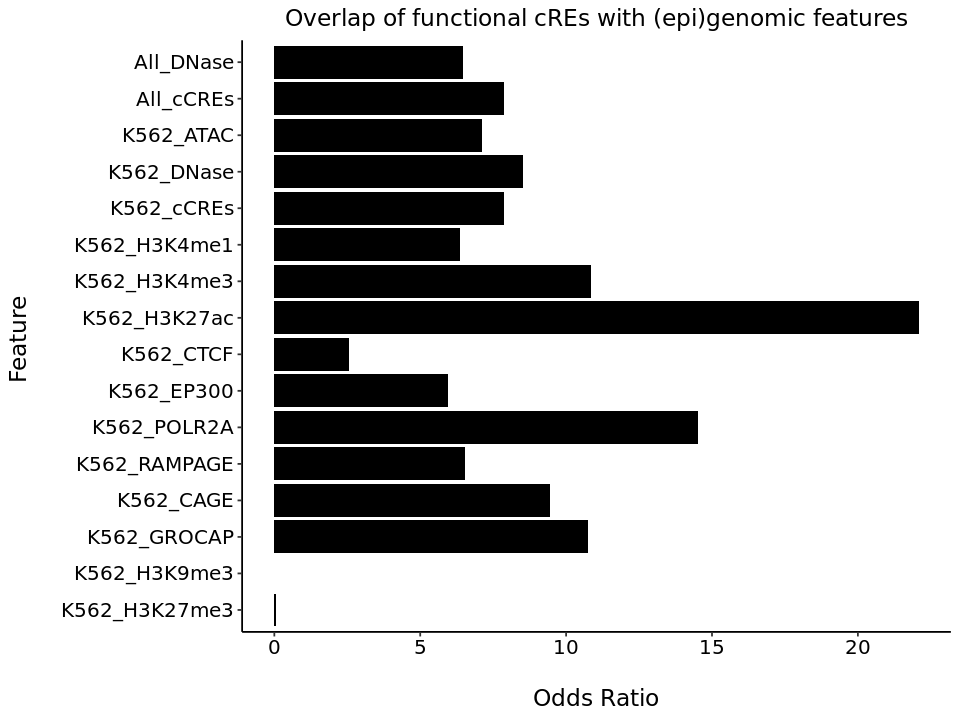

In [101]:
finaldf %>%
ggplot(aes(x = odds_ratio, y = feature)) +
geom_col(width = 0.9, fill = "black",position = position_dodge(0.1)) +
xlab("\nOdds Ratio") +
ylab("Feature \n") +
ggtitle("Overlap of functional cREs with (epi)genomic features") +
theme_classic() +
theme(
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, color = "black"),    
    legend.text = element_text(size = 12, color = "black"),
    legend.title = element_text(size = 14, color = "black"),
    plot.title = element_text(size = 14, color = "black", hjust = 0.5),
)

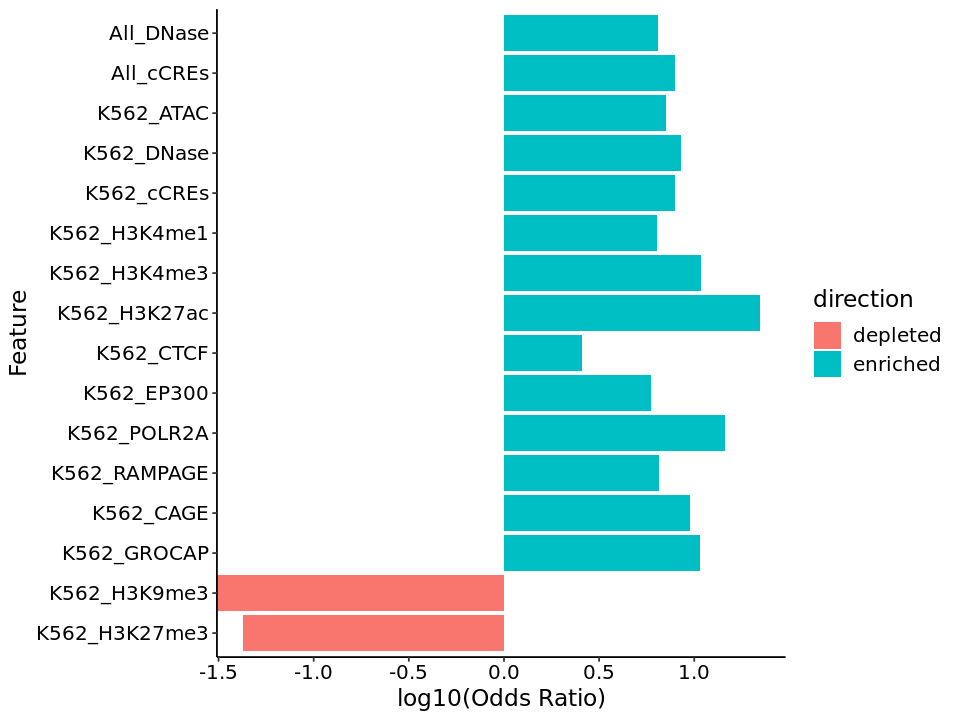

In [102]:
p1 <- 
finaldf %>%
mutate(direction = ifelse(odds_ratio < 1, "depleted", "enriched")) %>%
ggplot(aes(x = log10(odds_ratio), y = feature, fill = direction)) +
geom_col(width = 0.9, position = position_dodge(0.1)) + #fill = "black",
xlab("log10(Odds Ratio)") +
ylab("Feature") +
# ggtitle("Overlap of functional cREs with (epi)genomic features") +
# scale_fill_gradient(low="red",high="grey") +
theme_classic() +
theme(
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, color = "black"),    
    legend.text = element_text(size = 12, color = "black"),
    legend.title = element_text(size = 14, color = "black"),
    plot.title = element_text(size = 14, color = "black", hjust = 0.8),
)

p1

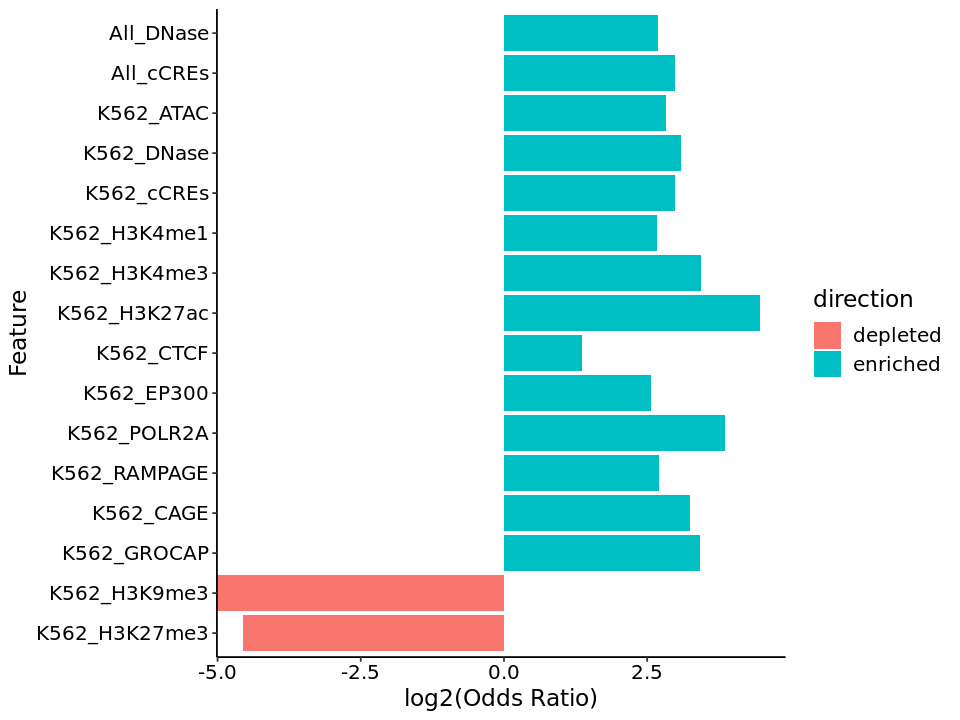

In [103]:
p2 <- finaldf %>%
mutate(direction = ifelse(odds_ratio < 1, "depleted", "enriched")) %>%
ggplot(aes(x = log2(odds_ratio), y = feature, fill = direction)) +
geom_col(width = 0.9, position = position_dodge(0.1)) + #fill = "black",
xlab("log2(Odds Ratio)") +
ylab("Feature") +
# ggtitle("Overlap of functional cREs with (epi)genomic features") +
# scale_fill_gradient(low="red",high="grey") +
theme_classic() +
theme(
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, color = "black"),    
    legend.text = element_text(size = 12, color = "black"),
    legend.title = element_text(size = 14, color = "black"),
    plot.title = element_text(size = 14, color = "black", hjust = 0.8),
)

p2

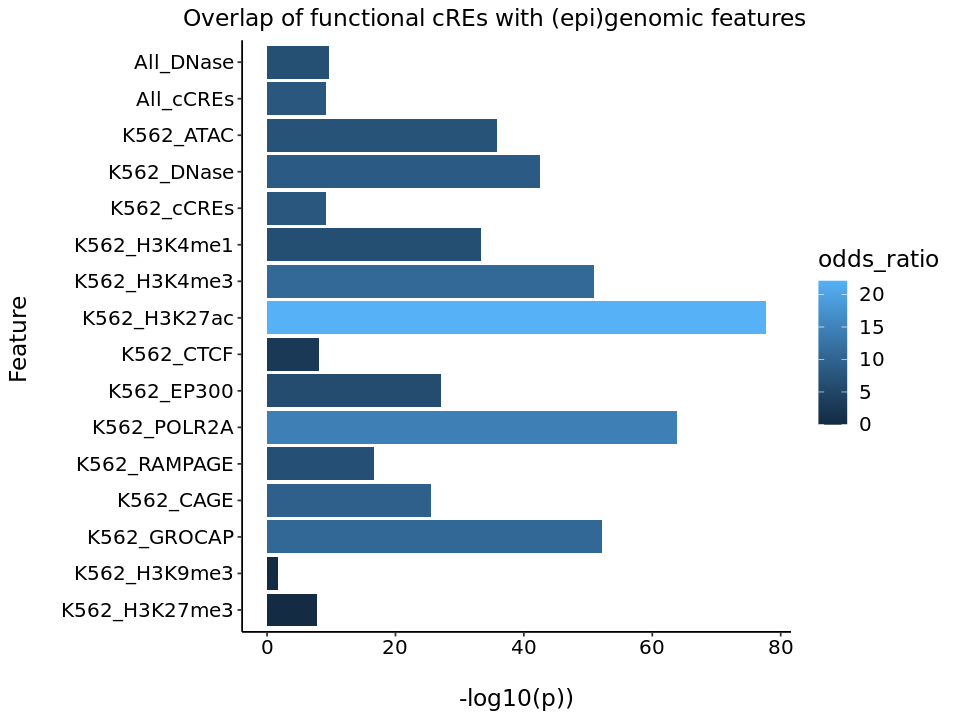

In [104]:
finaldf %>%
ggplot(aes(x = -log10(pvalue), y = feature, fill = odds_ratio)) +
geom_col(width = 0.9, position = position_dodge(0.1)) + #fill = "black",
xlab("\n-log10(p))") +
ylab("Feature \n") +
ggtitle("Overlap of functional cREs with (epi)genomic features") +
theme_classic() +
theme(
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, color = "black"),    
    legend.text = element_text(size = 12, color = "black"),
    legend.title = element_text(size = 14, color = "black"),
    plot.title = element_text(size = 14, color = "black", hjust = 0.8),
)

###### Plot the percent/count

In [105]:
depletedmarks <- c("K562_H3K9me3","K562_H3K27me3")

plotdf <-
workdf2 %>%
pivot_longer(cols = dnase_union:polr2a_k562, names_to = "feature", values_to = "overlap") %>%
group_by(feature,overlap) %>%
summarise(n=n()) %>%
ungroup() %>%
group_by(feature) %>%
mutate(total_count = sum(n),
       percent_bins = n/total_count) %>%
ungroup() %>%
mutate(direct_intersect = ifelse(overlap == 1, "yes", "no")) %>%
filter(direct_intersect == "yes") %>%
mutate(feature = case_when(
    feature == "atac_k562" ~ "K562_ATAC",
    feature == "dnase_k562" ~ "K562_DNase",
    feature == "ccre_k562" ~ "K562_cCREs",
    feature == "h3k4me1_k562" ~ "K562_H3K4me1",
    feature == "h3k4me3_k562" ~ "K562_H3K4me3",
    feature == "h3k9me3_k562" ~ "K562_H3K9me3",
    feature == "h3k27ac_k562" ~ "K562_H3K27ac",
    feature == "h3k27me3_k562" ~ "K562_H3K27me3",
    feature == "ep300_k562" ~ "K562_EP300",
    feature == "ctcf_k562" ~ "K562_CTCF",
    feature == "polr2a_k562" ~ "K562_POLR2A",
    feature == "rampage_k562" ~ "K562_RAMPAGE",
    feature == "cage_k562" ~ "K562_CAGE",
    feature == "grocap_capped_k562" ~ "K562_GROCAP",
    feature == "dnase_union" ~ "All_DNase",
    feature == "ccre_all" ~ "All_cCREs"
))  %>%
rbind(data.frame("feature" = "K562_H3K9me3",
                 "overlap" = 1, "n" = 0, "total_count" = 2306, 
                 "percent_bins" = 0, "direct_intersect" = "yes")) %>%
mutate(direction = ifelse(feature %in% depletedmarks, "depleted", "enriched")) 

plotdf$feature = factor(plotdf$feature, levels = c("K562_H3K27me3",
                                                   "K562_H3K9me3",
                                                   "K562_GROCAP",
                                                   "K562_CAGE",
                                                   "K562_RAMPAGE",
                                                   "K562_POLR2A",
                                                   "K562_EP300",
                                                   "K562_CTCF",
                                                   "K562_H3K27ac",
                                                   "K562_H3K4me3",
                                                   "K562_H3K4me1",
                                                   "K562_cCREs",
                                                   "K562_DNase",
                                                   "K562_ATAC",
                                                   "All_cCREs",
                                                   "All_DNase"))
plotdf

`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


feature,overlap,n,total_count,percent_bins,direct_intersect,direction
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
K562_ATAC,1,165,210,0.785714286,yes,enriched
All_cCREs,1,205,210,0.976190476,yes,enriched
K562_cCREs,1,205,210,0.976190476,yes,enriched
K562_CTCF,1,72,210,0.342857143,yes,enriched
K562_DNase,1,167,210,0.795238095,yes,enriched
All_DNase,1,203,210,0.966666667,yes,enriched
K562_EP300,1,89,210,0.423809524,yes,enriched
K562_H3K27ac,1,182,210,0.866666667,yes,enriched
K562_H3K27me3,1,1,210,0.004761905,yes,depleted


In [106]:
plotdf %>%
filter(grepl("K562",feature)) %>%
slice_max(percent_bins)

feature,overlap,n,total_count,percent_bins,direct_intersect,direction
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
K562_cCREs,1,205,210,0.9761905,yes,enriched


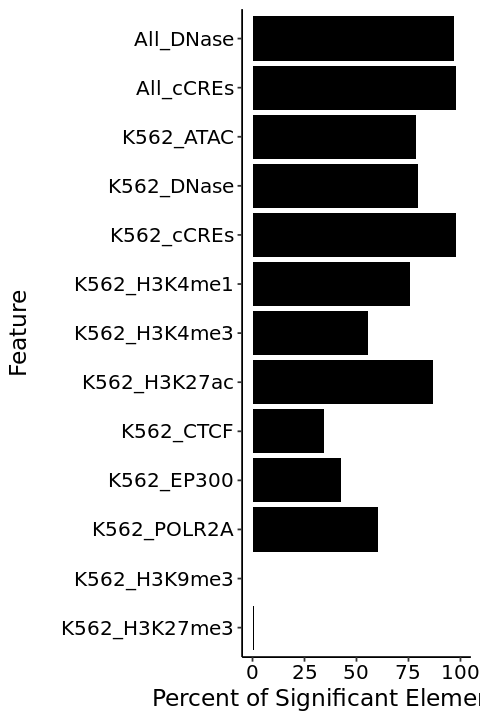

In [107]:
options(repr.plot.width = 4, repr.plot.height = 6)

p3 <-
plotdf %>%
ggplot(aes(y = feature, x = percent_bins*100)) + #, fill = direction
geom_col(fill = "black") +
xlab("Percent of Significant Elements (%)") +
ylab("Feature\n") +
xlim(0,100) +
# ggtitle("Overlap of functional cREs with (epi)genomic features") +
theme_classic() +
theme(
    axis.text = element_text(size = 12, color = "black"),
    axis.title = element_text(size = 14, color = "black"),    
    legend.text = element_text(size = 12, color = "black"),
    legend.title = element_text(size = 14, color = "black"),
    plot.title = element_text(size = 14, color = "black", hjust = 0.7)
)

p3

In [109]:
pdf(file="figure1/k562meta/outs/plot_pdfs/featureoverlap.oddsratio.k562.pdf")
p1
p2
dev.off()

png 
  2

In [110]:
pdf(file="figure1/k562meta/outs/plot_pdfs/featureoverlap.percentelements.k562.pdf")
p3
dev.off()

png 
  2

#### Put both plots together

In [111]:
suppressPackageStartupMessages(library(ggpubr))

Warning message:
“Removed 1 rows containing missing values (geom_text).”


png 
  2

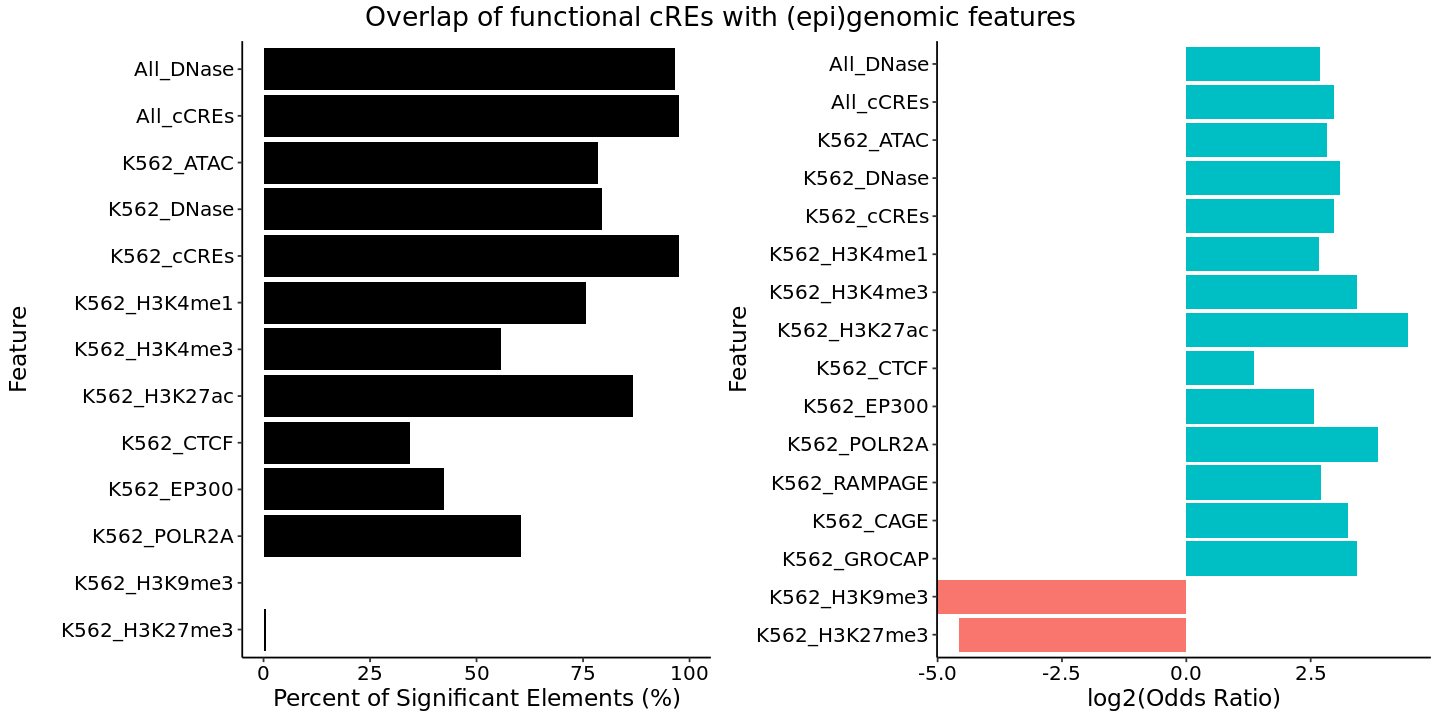

In [113]:
options(repr.plot.width = 12, repr.plot.height = 6)

figure <- ggarrange(p3,p2, 
          labels = NA,
          ncol = 2, nrow = 1,
#           common.legend = TRUE,
          legend = "none"
         )

p4 <- annotate_figure(figure,
                top = text_grob("Overlap of functional cREs with (epi)genomic features", color = "black", size = 16)
                )

p4

pdf(file="figure1/k562meta/outs/plot_pdfs/featureoverlap.combinedpanel.k562.pdf")
p4
dev.off()

#### Upset plot of K562 features

In [114]:
suppressPackageStartupMessages(library(UpSetR))
suppressPackageStartupMessages(library(ggplotify))

In [115]:
inputlist <- list(
   "Sig. CREs" = sigregions %>% pull(),
#     "dnase_union" = unionDnase,
#     "cCREs_all" = allccre,
    "cCREs" = cellccre,
    "ATAC" = atac,
    "DNase" = dnase,
    "H3K27ac" = h3k27ac,
    "H3K4me1" = h3k4me1,
    "H3K4me3" = h3k4me3,
#     "H3K9me3" = h3k9me3,
#     "H3K27me3" = h3k27me3,
    "EP300" = ep300,
    "CTCF" = ctcf,
    "POLR2A" = polr2a,
    "RAMPAGE" = rampage,
    "CAGE" = cage,
    "GROCAP" = grocap_capped
)


In [121]:
p1 <- upset(fromList(inputlist), 
      order.by = "freq",
      nsets = 15,
      nintersects = 40,
      queries = list(list(query = intersects, params = list(
          "cCREs","ATAC","DNase","H3K27ac","H3K4me1","H3K4me3","EP300","CTCF","POLR2A","Sig. CREs","RAMPAGE","CAGE","GROCAP"), 
                          color = "lightblue", active = T)),
      # set_size.show = TRUE, ### these do not look good when added in R, add later in Illustrator
      # set_size.numbers_size = 5,
      point.size = 2, 
      line.size = 1, 
      mainbar.y.label = "Intersection Size", 
      sets.x.label = "Overlap with CREs", 
      # text.scale = c(2, 2, 1.5, 1.5, 2, 1), # intersection size title, intersection size tick labels, set size title, set size tick labels, set names, numbers above bars
      main.bar.color = "black", 
    )


p1anno <- annotate_figure(as.grob(p1), top = text_grob("Overlap of functional cREs with K562 features", 
               color = "black", size = 14, family = "sans")) 

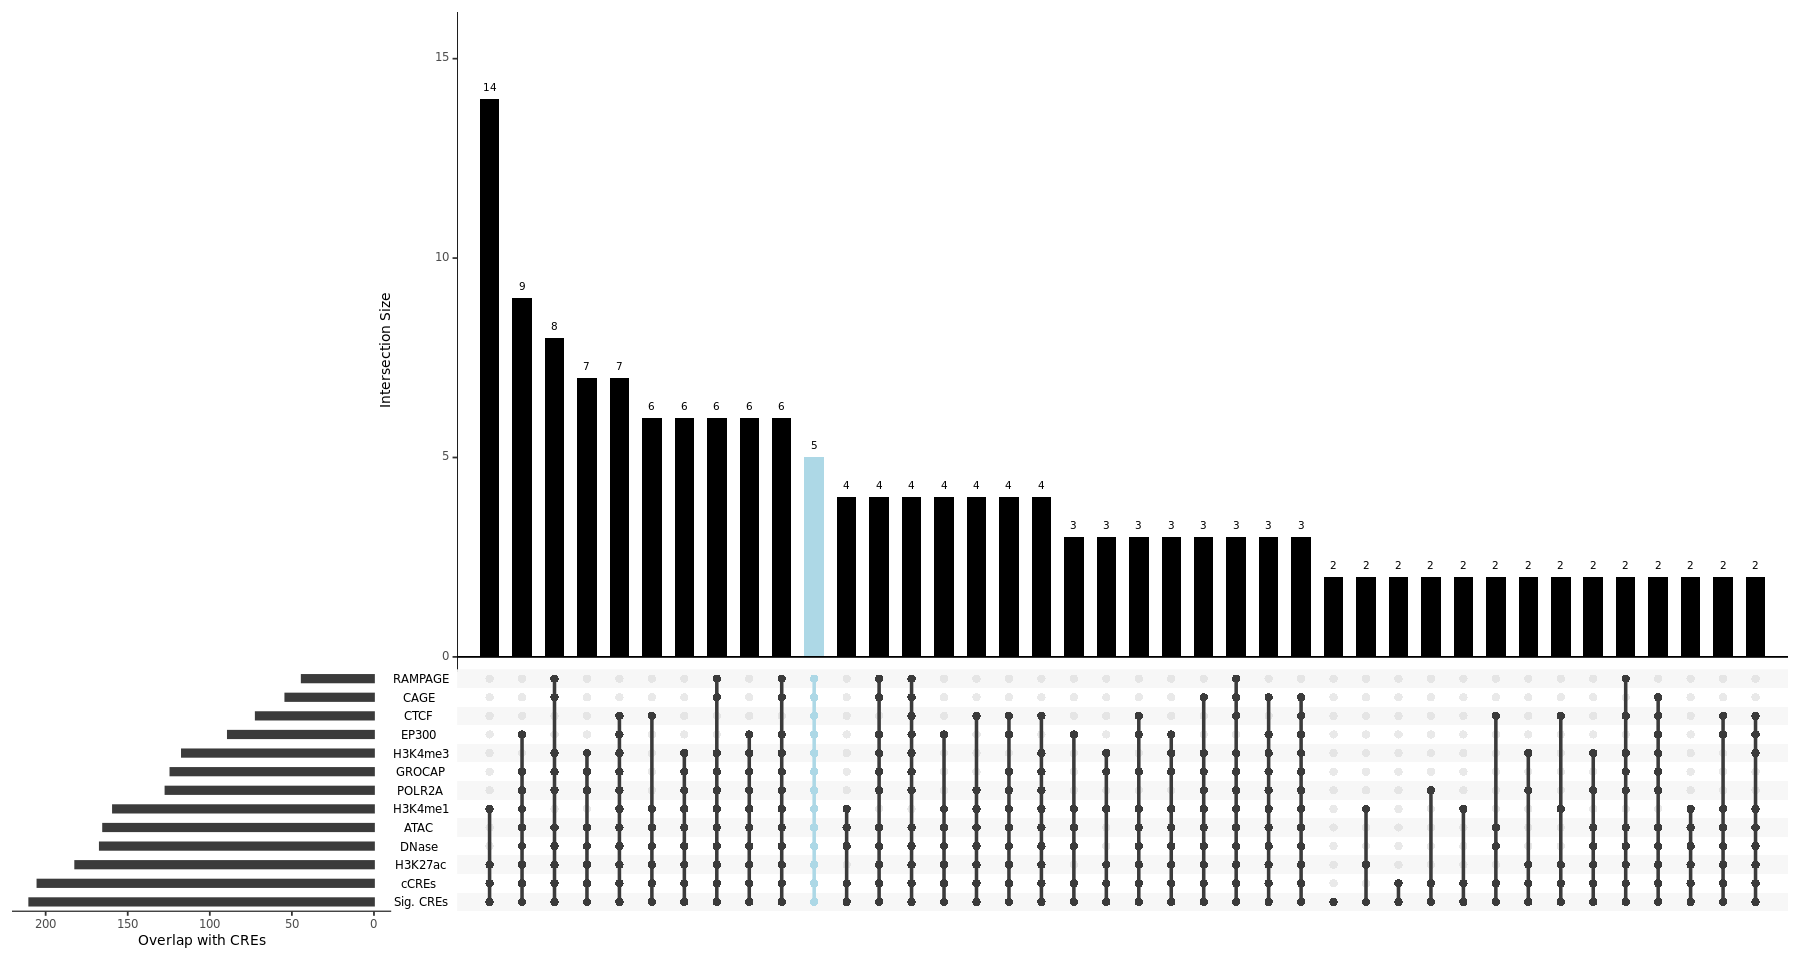

In [122]:
options(repr.plot.width = 15, repr.plot.height = 8)
p1

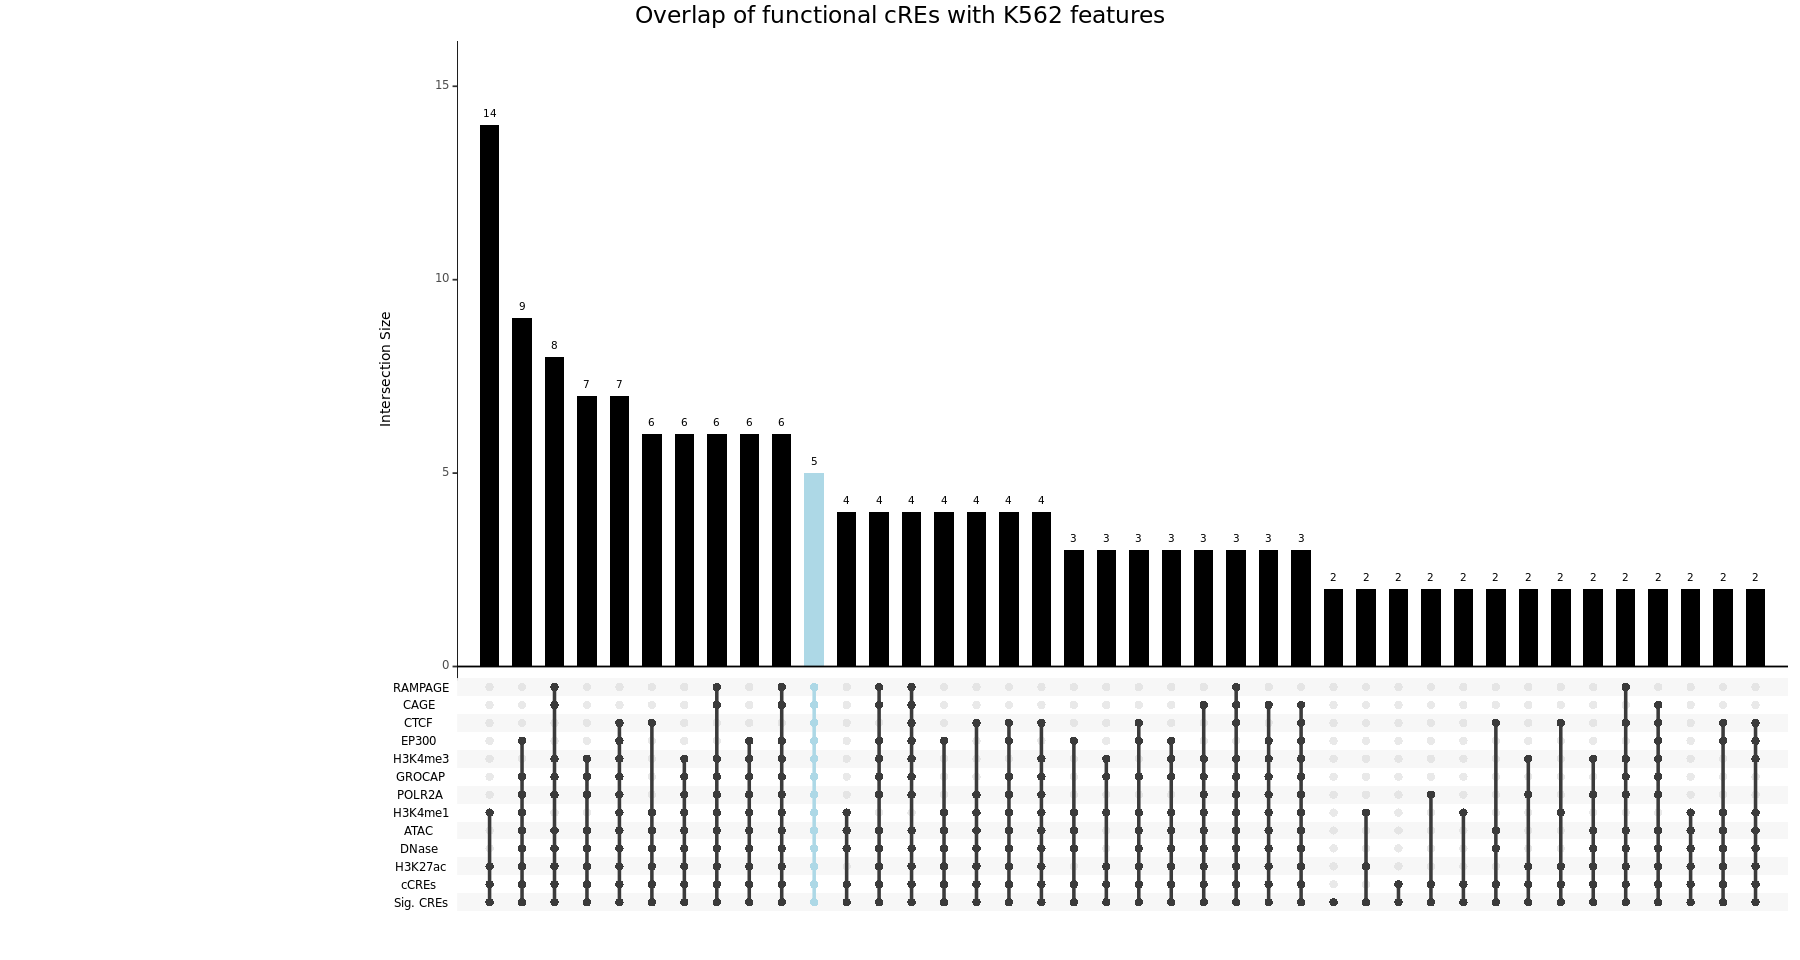

In [123]:
p1anno

### Calculations realted to Figure 1 text

#### Feature with greatest overlap

In [157]:
plotdf %>%
slice_max(n,n=1)

feature,overlap,n,total_count,percent_bins,direct_intersect,direction
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
All_cCREs,1,205,210,0.9761905,yes,enriched
K562_cCREs,1,205,210,0.9761905,yes,enriched


#### Features with greatest odds ratios

In [138]:
res %>%
slice_max(odds_ratio, n=3)

feature,pvalue,odds_ratio,alternative
<chr>,<dbl>,<dbl>,<chr>
K562_H3K27ac,1.913495e-78,22.08260,two.sided
K562_POLR2A,1.568287e-64,14.52758,two.sided
K562_H3K4me3,1.108678e-51,10.83966,two.sided


#### Number of CREs with both H3K27ac AND ATAC-seq

In [139]:
workdf2 %>%
filter(h3k27ac_k562 == 1 & atac_k562 == 1) %>%
select(bin) %>% distinct() %>% count() %>% pull()

[1] 148

#### Number of CREs with both H3K27ac AND ATAC-seq OR both H3K27ac AND DNase

In [140]:
workdf2 %>%
filter((h3k27ac_k562 == 1 & atac_k562 == 1) | (h3k27ac_k562 == 1 & dnase_k562 == 1)) %>%
select(bin) %>% distinct() %>% count() %>% pull()

[1] 158

#### Number and percent of CREs with H3K27ac OR ATAC-seq OR DNase

In [141]:
workdf2 %>%
filter(h3k27ac_k562 == 1 | atac_k562 == 1 | dnase_k562 == 1) %>%
select(bin) %>% distinct() %>% count() %>% pull()

[1] 200

In [147]:
(workdf2 %>%
filter(h3k27ac_k562 == 1 | atac_k562 == 1 | dnase_k562 == 1) %>%
select(bin) %>% distinct() %>% count() %>% pull()) / (sigregions %>% select(bin) %>% distinct() %>% count() %>% pull()) * 100

[1] 95.2381

#### Number and percent of CREs with H3K27ac but no ATAC or DNase

In [148]:
workdf2 %>%
filter(h3k27ac_k562 == 1 & atac_k562 == 0 & dnase_k562 == 0) %>%
select(bin) %>% distinct() %>% count() %>% pull()

[1] 24

In [151]:
workdf2 %>%
filter(h3k27ac_k562 == 1 & atac_k562 == 0 & dnase_k562 == 0) %>%
select(bin) %>% distinct() %>% count() %>% pull() / (sigregions %>% select(bin) %>% distinct() %>% count() %>% pull()) * 100

[1] 11.42857

#### Number and percent of CREs with ATAC or DNase but not H3K27ac

In [150]:
workdf2 %>%
filter((h3k27ac_k562 == 0 & atac_k562 == 1) | (h3k27ac_k562 == 0 & dnase_k562 == 1)) %>%
select(bin) %>% distinct() %>% count() %>% pull()

[1] 18

In [152]:
workdf2 %>%
filter((h3k27ac_k562 == 0 & atac_k562 == 1) | (h3k27ac_k562 == 0 & dnase_k562 == 1)) %>%
select(bin) %>% distinct() %>% count() %>% pull() / (sigregions %>% select(bin) %>% distinct() %>% count() %>% pull()) * 100

[1] 8.571429

#### Regions that lack H3K27ac and ATAC/DNase

In [130]:
workdf2 %>%
filter(h3k27ac_k562 == 0 & atac_k562 == 0 & dnase_k562 == 0) 

bin,dnase_union,ccre_all,ccre_k562,dnase_k562,atac_k562,h3k27ac_k562,h3k4me1_k562,h3k4me3_k562,h3k9me3_k562,h3k27me3_k562,ep300_k562,ctcf_k562,polr2a_k562,rampage_k562,cage_k562,grocap_capped_k562
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr4:55602900-55607000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
chr4:55608900-55611000,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
chr4:55810900-55812000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chr11:34085800-34086900,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
chr11:61796700-61797200,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
chr11:61864500-61864800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
chr11:61892600-61893000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
chr12:111995000-111995700,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1
chr19:12936400-12937000,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Browser track screenshots for CREs that lack all features

Note that the cCRE tracks included in the browser track images are the v3 SCREEN cCREs while the v4 set was used for all analyses.

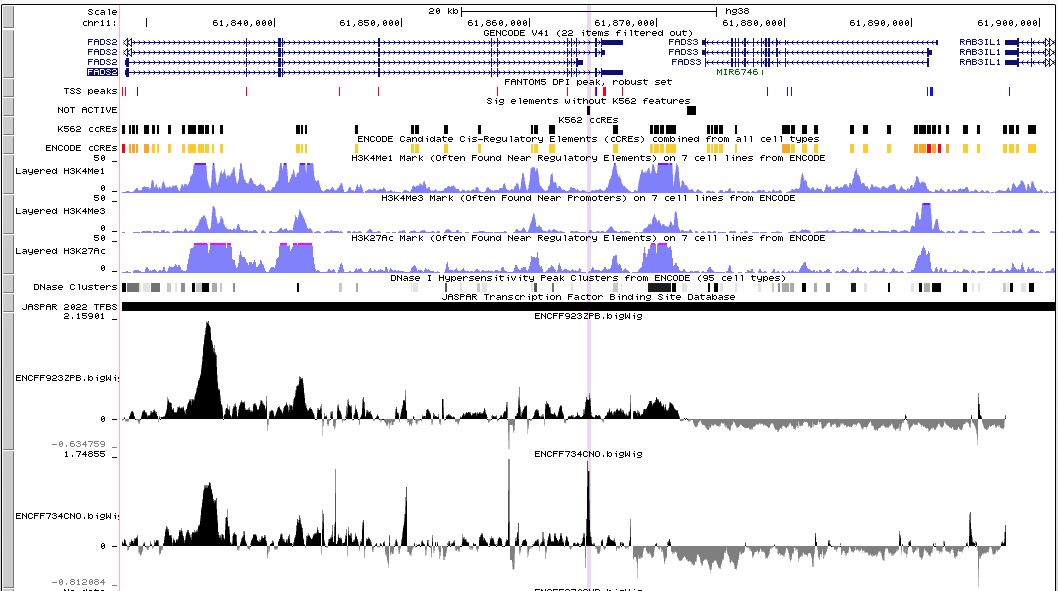

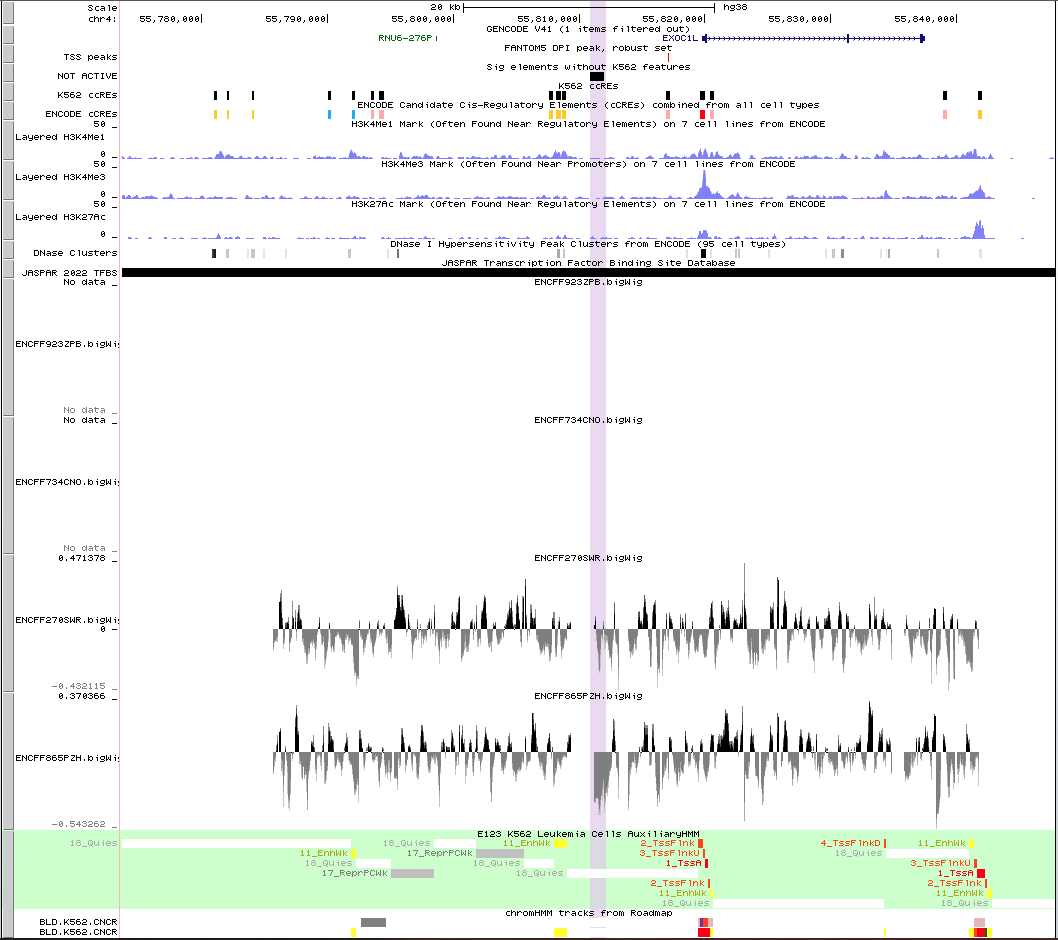